In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

## Let's use clustering method to understand the dataset.
Questions:
1. Could these fraud transactions have different categories?
2. If there are any categories, how many cluster can we assign to facilitate our predictions?
3. Addding flags or label to different fraud transactions will help our next step training and predictions?

In [2]:
# load file, since the data are well prepared, we directly use this data for clustering exploration
filepath = "../Data/creditcard.csv"
df = pd.read_csv(filepath)

scale = StandardScaler()
df['log_amount'] = scale.fit_transform(df['Amount'].to_numpy().reshape(-1,1)) # modify the data, so it will not skew the data too much
#df.drop(['Amount'], axis=1, inplace= True)
X = df.drop(['Class'], axis=1)
X_reduced = X.drop(['Time'], axis = 1)
y = df['Class']


In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,log_amount,Labels0,Labels1,Labels3,Labels4
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0.244964,2,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,-0.342475,2,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,2,0,0,3
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0.140534,2,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,-0.073403,2,0,0,0


Text(0, 0.5, 'Inertia')

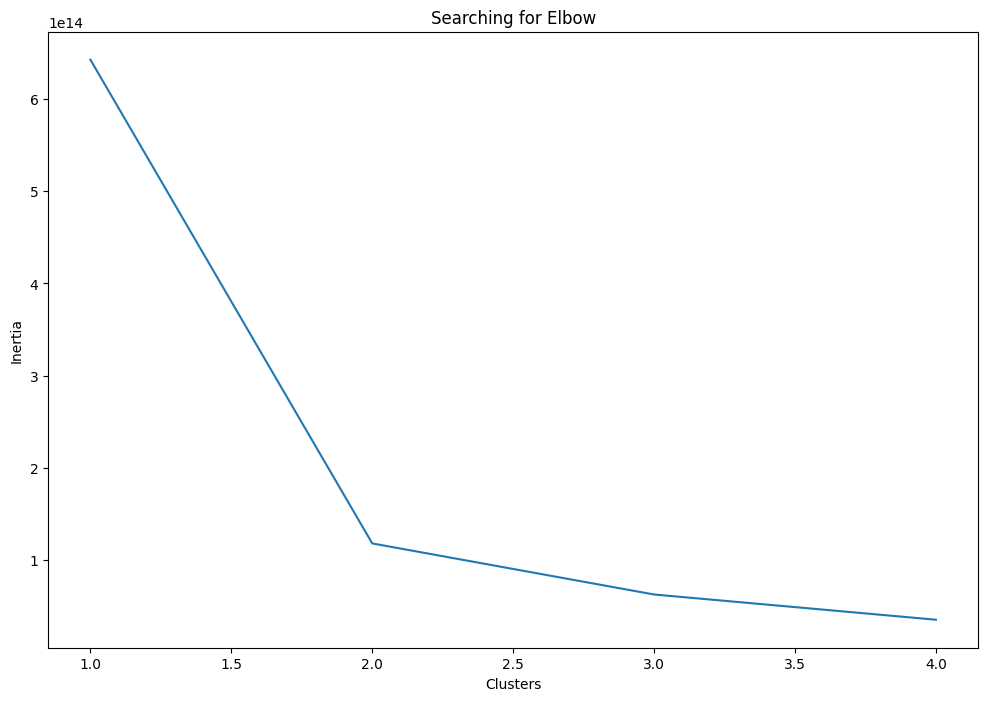

In [4]:
# test 1 to 5 clusters with KMeans for original dataset
clusters = []
for i in range(1, 5):
    km =  KMeans(n_clusters=i).fit(df) 
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 5)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

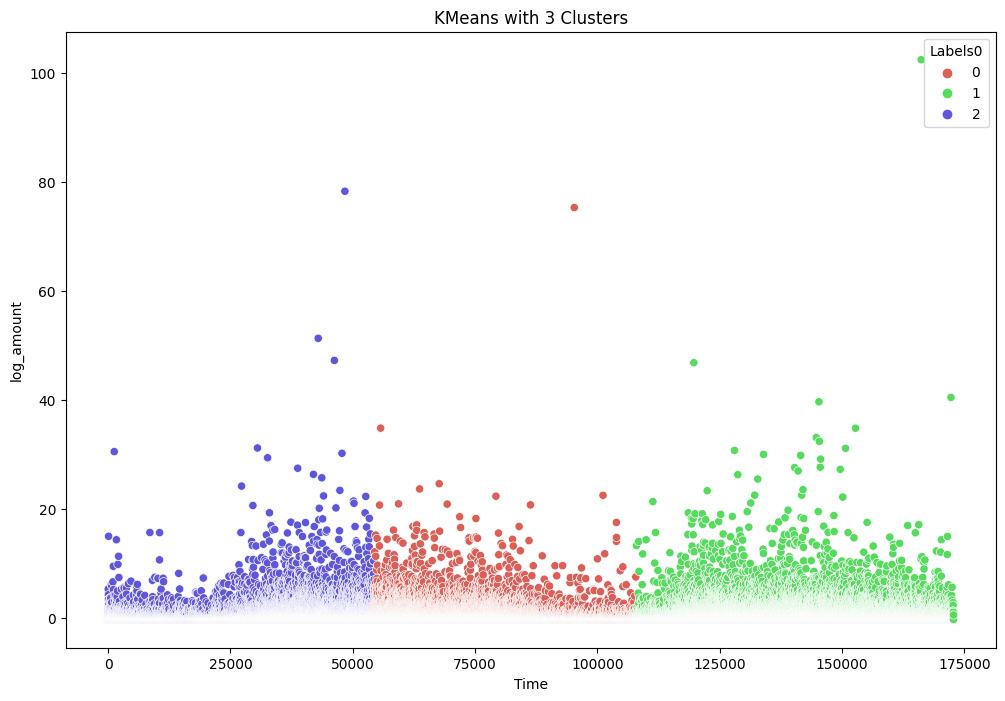

In [5]:
km3 = KMeans(n_clusters = 3).fit(X) 

df['Labels0'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, y ='log_amount', x = 'Time', hue='Labels0', 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

Text(0, 0.5, 'Inertia')

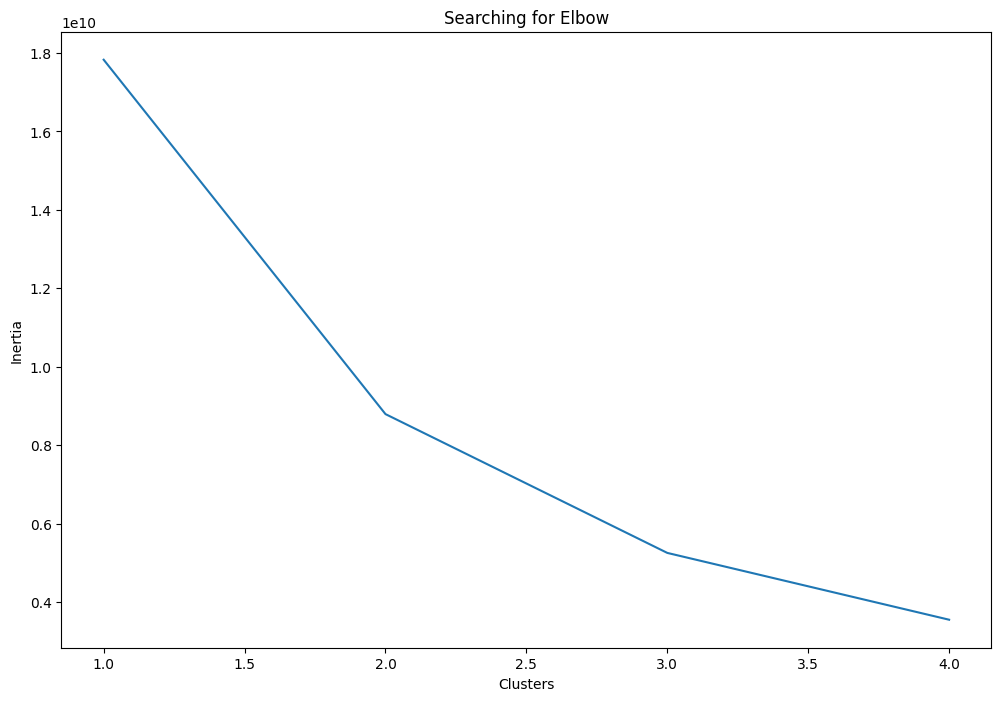

In [6]:
# test 1 to 5 clusters with KMeans for dataset without time
clusters = []
for i in range(1, 5):
    km =  KMeans(n_clusters=i).fit(X_reduced) 
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 5)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

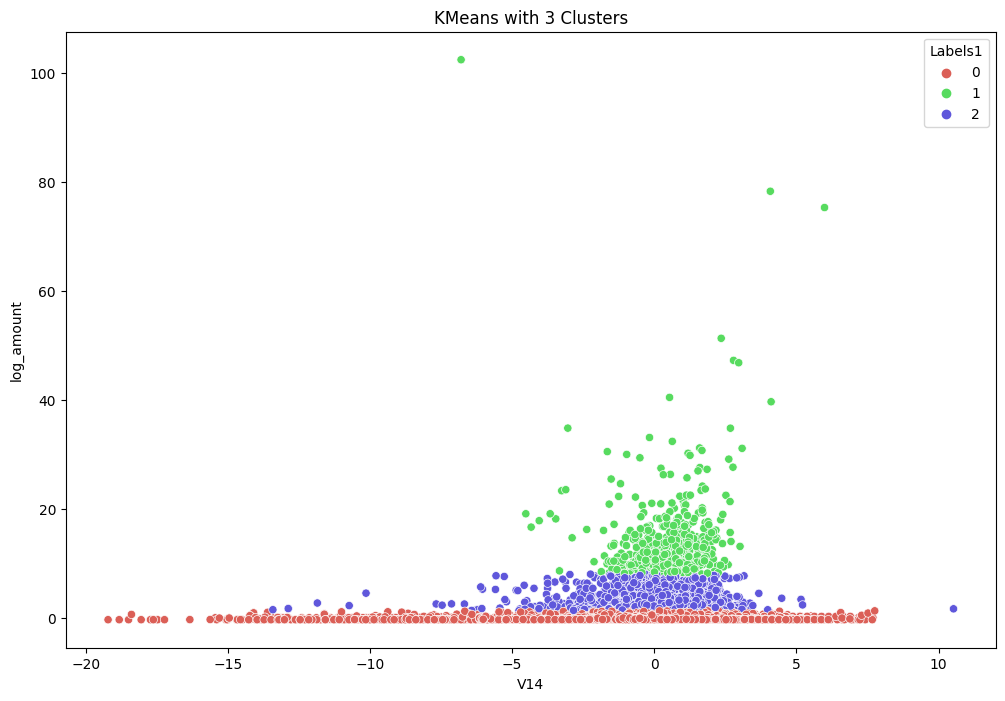

In [7]:
km3 = KMeans(n_clusters = 3).fit(X_reduced) 

df['Labels1'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, y ='log_amount', x = 'V14', hue='Labels1', 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_11274/3911777865.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data = df, y ='log_amount', x = 'V14', hue='Class',


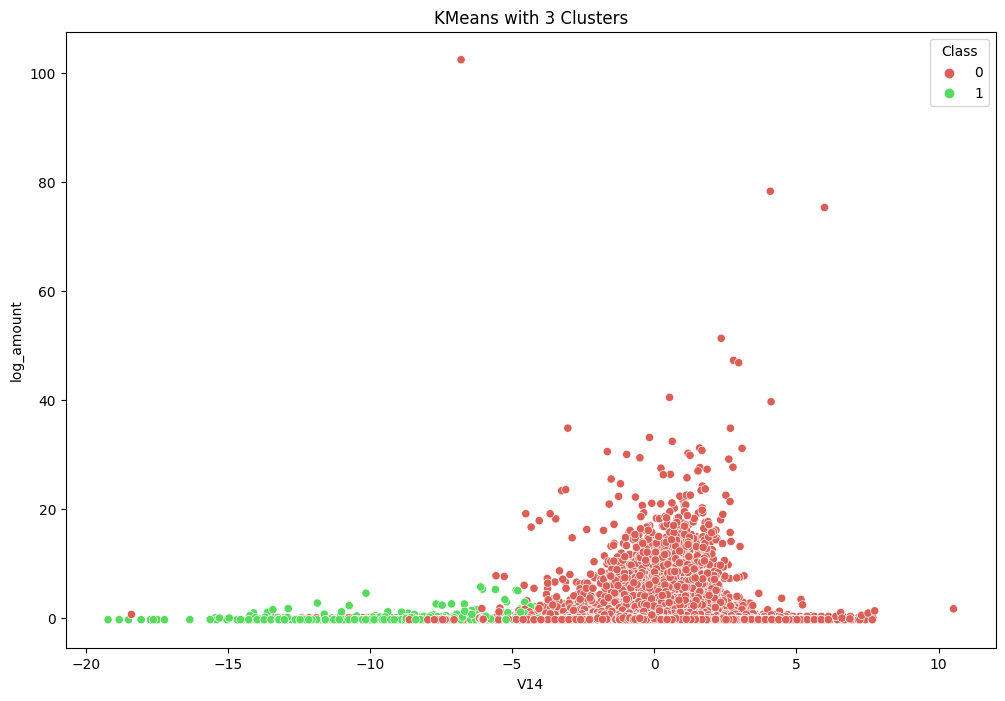

In [8]:
# visulize v14 feature according to Rank importance
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, y ='log_amount', x = 'V14', hue='Class', 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_11274/3210937301.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data = df, y ='V10', x = 'V14', hue='Class',


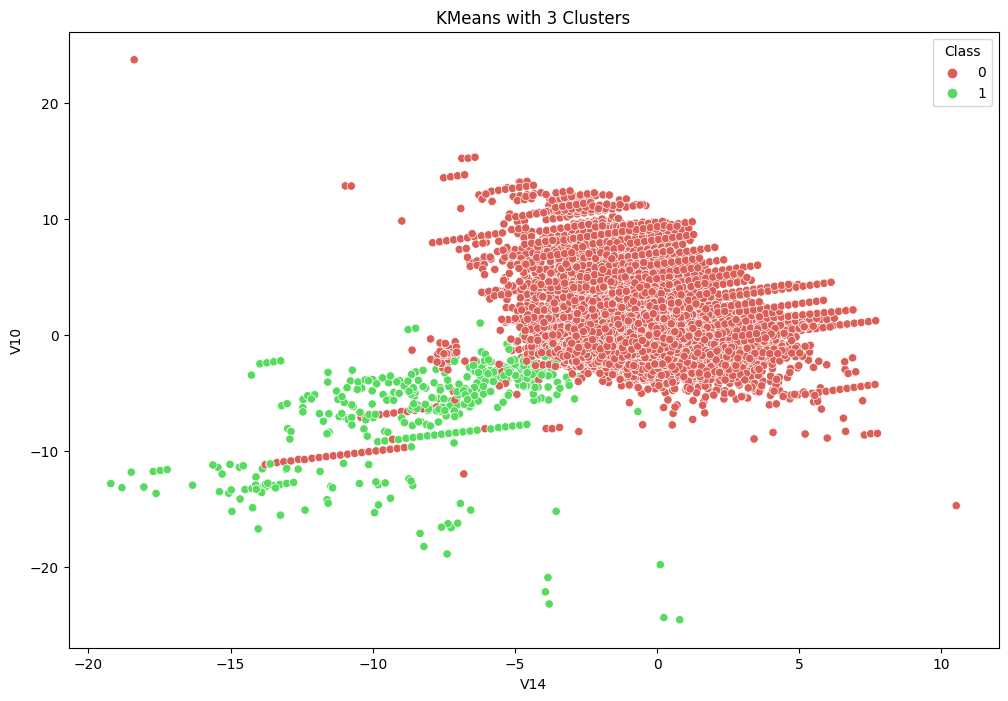

In [9]:
# visulize v10 and v14 feature according to Rank importance
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, y ='V10', x = 'V14', hue='Class', 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

/var/folders/0z/5dyhp7xx5g700b6sqbzkl_fw0000gn/T/ipykernel_11274/2346176170.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data = df, y ='V10', x = 'V14', hue='Labels3',


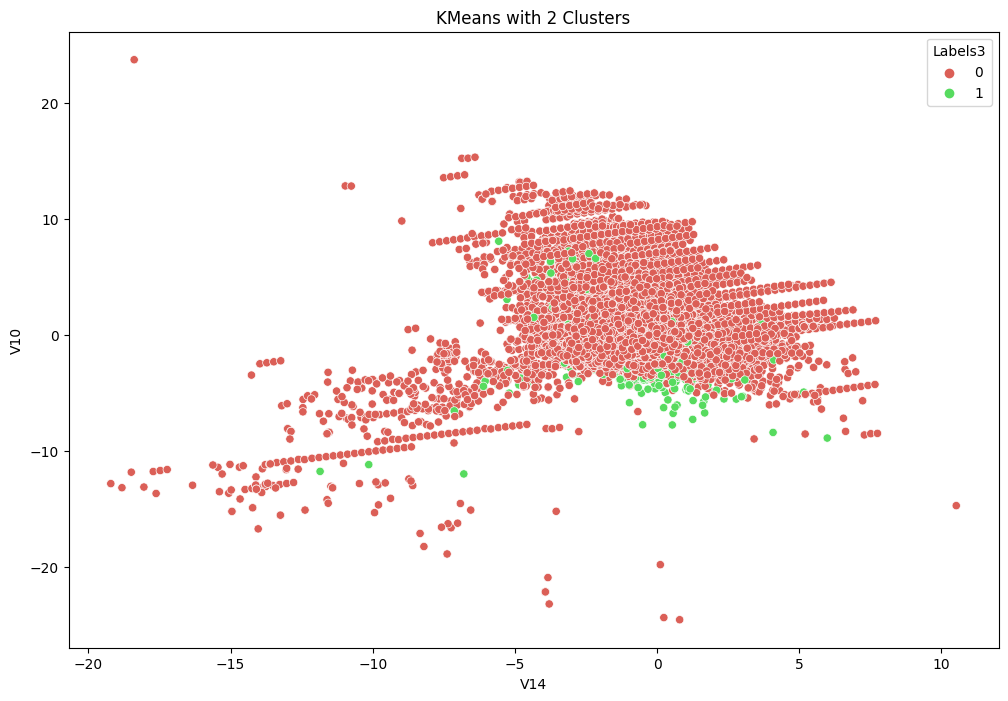

In [10]:
km2 = KMeans(n_clusters = 2).fit(X_reduced) 

df['Labels3'] = km2.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, y ='V10', x = 'V14', hue='Labels3', 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 2 Clusters')
plt.show()

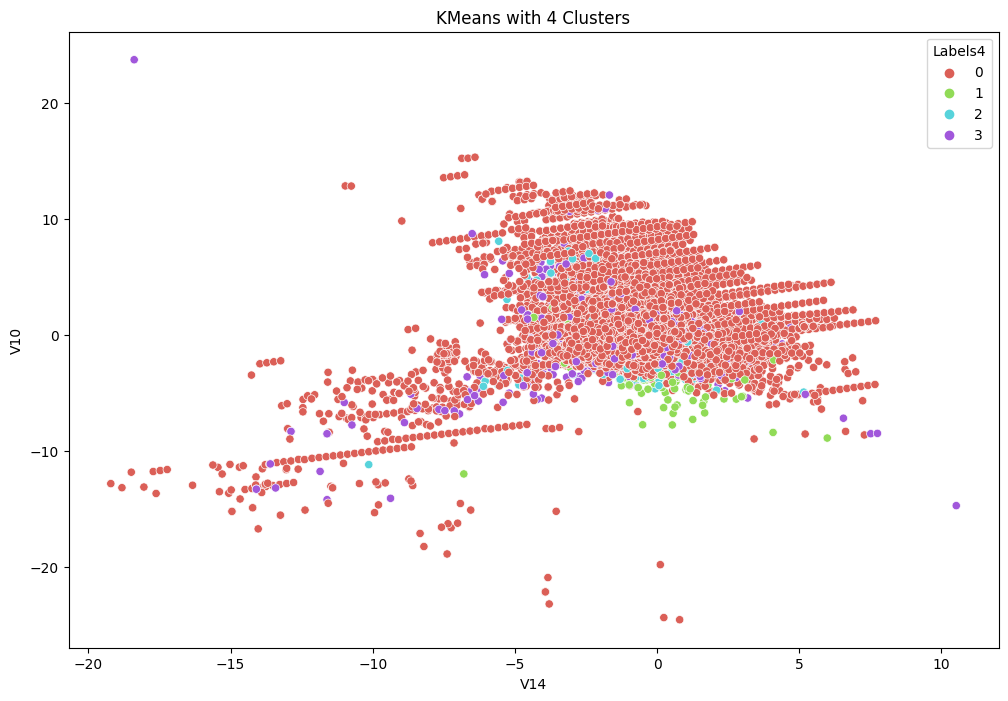

In [11]:
# visulize v10 and v14 feature according to Rank importance
km4 = KMeans(n_clusters = 4).fit(X_reduced) 
df['Labels4'] = km4.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data = df, y ='V10', x = 'V14', hue='Labels4', 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

In [14]:
acc = df['Class'] - df['Labels1']

In [27]:

df['Labels1'].astype(bool)

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Name: Labels1, Length: 284807, dtype: bool

In [33]:
label1 = df[df['Labels1']==1]['Labels1'].sum()
class1 = df[df['Class']==1]['Class'].sum()

print("Two clusters labels for fraud is ", label1, "True frauds are ", class1)

Two clusters labels for fraud is  616 True frauds are  492
